# Step -1 : Data Loading and Preprocessing

In [17]:
import pandas as pd
import numpy as np

df = pd.read_csv('top_insta_influencers_data.csv')

print("Shape of the dataset:", df.shape)

Shape of the dataset: (200, 10)


In [18]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [20]:
missing_summary = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing_summary)

Missing values per column:
 country              62
rank                  0
channel_info          0
influence_score       0
followers             0
posts                 0
avg_likes             0
60_day_eng_rate       0
new_post_avg_like     0
total_likes           0
dtype: int64


In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
df.describe()

,rank,influence_score
count,200.000000,200.000000
mean,100.500000,81.820000
std,57.879185,8.878159
min,1.000000,22.000000
25%,50.750000,80.000000
50%,100.500000,84.000000
75%,150.250000,86.000000
max,200.000000,93.000000


In [23]:
df['60_day_eng_rate'].value_counts(dropna=False)

60_day_eng_rate
0.02%    5
0.41%    4
0.57%    4
0.51%    3
0.08%    3
        ..
3.58%    1
1.61%    1
1.40%    1
0.26%    1
1.42%    1
Name: count, Length: 147, dtype: int64

In [24]:
print(df['60_day_eng_rate'].unique())

['1.39%' '1.62%' '1.24%' '0.97%' '0.20%' '0.88%' '1.20%' '0.76%' '0.35%'
 '0.59%' '2.04%' '0.07%' '0.08%' '1.01%' '0.62%' '0.96%' '0.53%' '0.67%'
 '0.51%' '1.09%' '0.16%' '3.17%' '1.10%' '0.27%' '0.02%' '0.92%' '0.48%'
 '0.22%' '0.64%' '5.02%' '1.26%' '0.69%' '0.60%' '1.53%' '1.00%' '9.00%'
 '0.41%' '0.17%' '2.56%' '0.46%' '1.17%' '0.04%' '2.16%' '0.54%' '0.28%'
 '2.87%' '8.36%' '3.01%' '3.14%' '2.23%' '10.83%' '0.49%' '0.01%' '5.40%'
 '2.25%' '0.30%' '2.19%' '0.58%' '9.43%' '1.12%' '1.15%' '0.52%' '9.72%'
 '2.34%' '0.44%' '0.78%' '8.63%' '3.69%' '10.25%' '0.85%' '0.25%' '8.18%'
 '2.06%' '1.33%' '2.05%' '0.57%' '1.02%' '1.85%' '1.06%' '0.66%' '2.18%'
 '0.11%' '1.52%' '3.82%' '1.22%' '1.21%' '0.75%' '0.91%' '25.80%' '3.55%'
 '3.28%' '0.15%' '2.88%' '2.77%' '1.75%' '1.43%' '0.29%' '6.38%' '3.47%'
 '0.63%' '0.03%' '8.81%' '5.71%' '0.12%' '2.76%' '2.61%' '0.71%' '1.48%'
 '0.33%' '1.05%' '0.43%' '1.49%' '13.09%' '0.55%' '26.41%' '1.98%' '1.76%'
 '3.97%' '1.88%' '2.49%' '0.42%' '0.23%' '8.56

In [25]:
print("Empty strings:", (df['60_day_eng_rate'] == '').sum())

Empty strings: 0


In [26]:
print("Whitespace-only values:", df['60_day_eng_rate'].apply(lambda x: isinstance(x, str) and x.strip() == '').sum())

Whitespace-only values: 0


In [27]:
print("Empty strings:", (df['60_day_eng_rate'] == 'NaN%').sum())

Empty strings: 1


In [28]:
df['60_day_eng_rate'] = df['60_day_eng_rate'].replace('NaN%', np.nan)

df['60_day_eng_rate'] = df['60_day_eng_rate'].str.replace('%', '').astype(float) / 100

In [29]:
replace = {'b': 'e9', 'm': 'e6', 'k': 'e3'}
convert_column = ['total_likes', 'posts', 'followers', 'avg_likes', 'new_post_avg_like']
df[convert_column] = df[convert_column].replace(replace, regex=True).astype(float)
df[convert_column]

,total_likes,posts,followers,avg_likes,new_post_avg_like
0,2.900000e+10,3300.0,475800000.0,8700000.0,6500000.0
1,5.740000e+10,6900.0,366200000.0,8300000.0,5900000.0
2,6.000000e+09,890.0,357300000.0,6800000.0,4400000.0
3,1.150000e+10,1800.0,342700000.0,6200000.0,3300000.0
4,1.250000e+10,6800.0,334100000.0,1900000.0,665300.0
...,...,...,...,...,...
195,1.400000e+09,2300.0,33200000.0,623800.0,464700.0
196,1.500000e+09,3800.0,33200000.0,390400.0,208000.0
197,1.492000e+08,770.0,33200000.0,193300.0,82600.0
198,1.700000e+09,2300.0,33000000.0,719600.0,467700.0


In [30]:
df.rename(columns={'channel_info': 'account_name'}, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               200 non-null    int64  
 1   account_name       200 non-null    object 
 2   influence_score    200 non-null    int64  
 3   posts              200 non-null    float64
 4   followers          200 non-null    float64
 5   avg_likes          200 non-null    float64
 6   60_day_eng_rate    199 non-null    float64
 7   new_post_avg_like  200 non-null    float64
 8   total_likes        200 non-null    float64
 9   country            138 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 15.8+ KB


In [32]:
print(df['60_day_eng_rate'].head())

0    0.0139
1    0.0162
2    0.0124
3    0.0097
4    0.0020
Name: 60_day_eng_rate, dtype: float64


# Step -2 : EDA

In [33]:
print(df.describe())
print(df.isnull().sum())

             rank  influence_score         posts     followers     avg_likes  \
count  200.000000       200.000000    200.000000  2.000000e+02  2.000000e+02   
mean   100.500000        81.820000   3499.850000  7.740950e+07  1.787104e+06   
std     57.879185         8.878159   3475.828158  7.368727e+07  2.193359e+06   
min      1.000000        22.000000     10.000000  3.280000e+07  6.510000e+04   
25%     50.750000        80.000000    947.500000  4.000000e+07  5.044000e+05   
50%    100.500000        84.000000   2100.000000  5.005000e+07  1.100000e+06   
75%    150.250000        86.000000   5025.000000  6.890000e+07  2.100000e+06   
max    200.000000        93.000000  17500.000000  4.758000e+08  1.540000e+07   

       60_day_eng_rate  new_post_avg_like   total_likes  
count       199.000000       2.000000e+02  2.000000e+02  
mean          0.019020       1.208132e+06  3.658112e+09  
std           0.033297       1.858322e+06  5.561939e+09  
min           0.000100       0.000000e+00  1.83

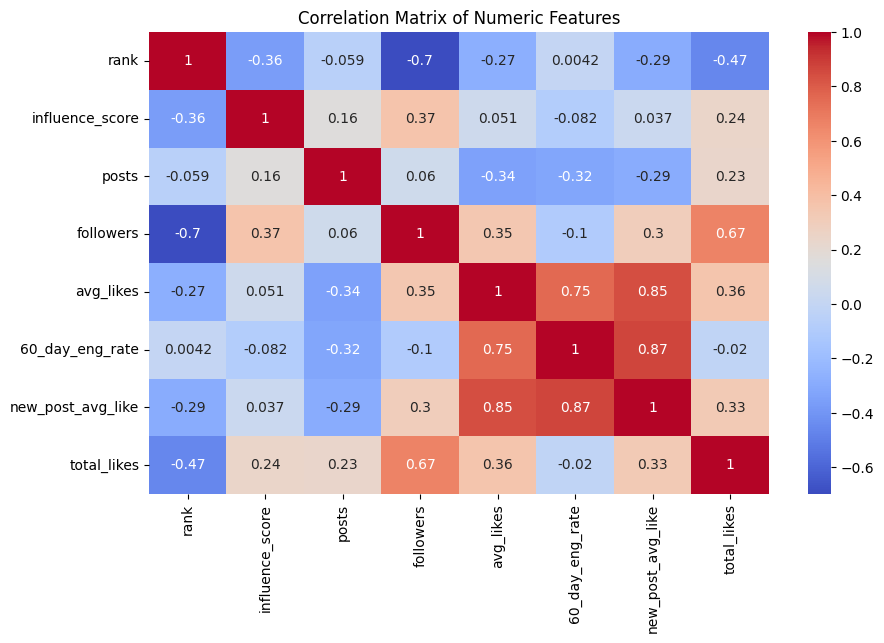

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

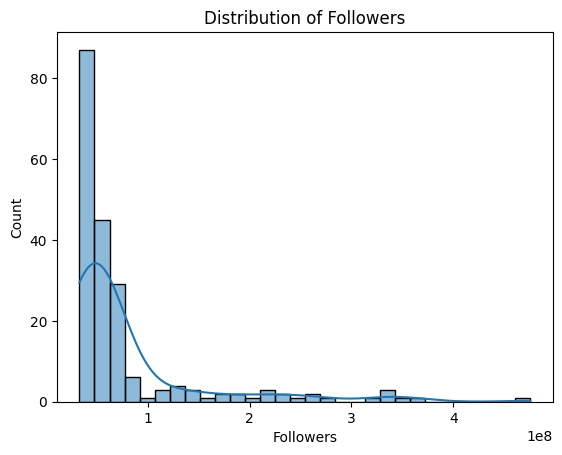

In [36]:
sns.histplot(df['followers'], bins=30, kde=True)
plt.title("Distribution of Followers")
plt.xlabel("Followers")
plt.ylabel("Count")
plt.show()

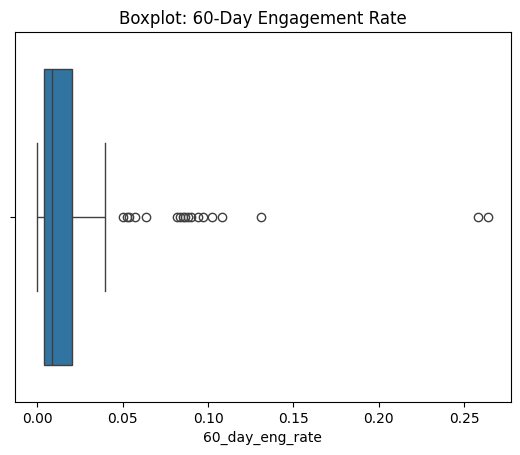

In [37]:
sns.boxplot(x=df['60_day_eng_rate'])
plt.title("Boxplot: 60-Day Engagement Rate")
plt.show()

In [38]:
df['60_day_eng_rate'].describe()

count    199.000000
mean       0.019020
std        0.033297
min        0.000100
25%        0.004100
50%        0.008800
75%        0.020350
max        0.264100
Name: 60_day_eng_rate, dtype: float64

In [44]:
Q1 = 0.0041
Q3 = 0.02035
IQR = Q3 - Q1
Upper_bound = Q3 + 1.5 * IQR 
print("IQR :",IQR)
print("Upper_bound :", Upper_bound)

IQR : 0.01625
Upper_bound : 0.044725


In [45]:
df_clean = df[df['60_day_eng_rate'] <= Upper_bound]

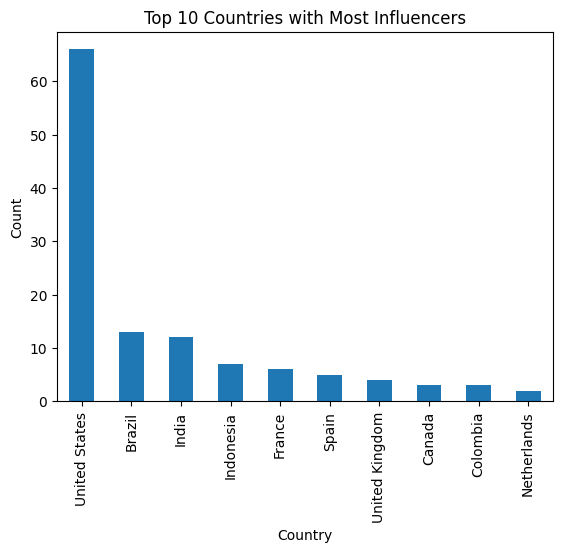

In [46]:
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries with Most Influencers")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

In [47]:
df.isnull().sum()

rank                  0
account_name          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       1
new_post_avg_like     0
total_likes           0
country              62
dtype: int64

In [48]:
df['country'] = df['country'].fillna('Unknown')

In [49]:
df['60_day_eng_rate'] = df['60_day_eng_rate'].fillna(df['60_day_eng_rate'].mean())

In [50]:
df.isnull().sum()

rank                 0
account_name         0
influence_score      0
posts                0
followers            0
avg_likes            0
60_day_eng_rate      0
new_post_avg_like    0
total_likes          0
country              0
dtype: int64

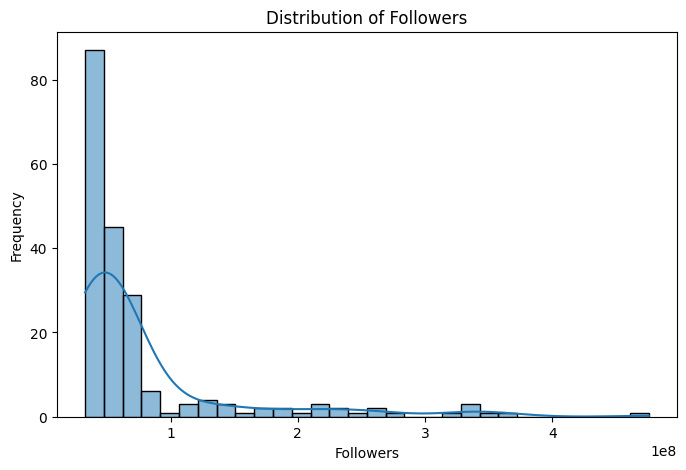

In [51]:
plt.figure(figsize=(8, 5))
sns.histplot(df['followers'], bins=30, kde=True)
plt.title("Distribution of Followers")
plt.xlabel("Followers")
plt.ylabel("Frequency")
plt.show()

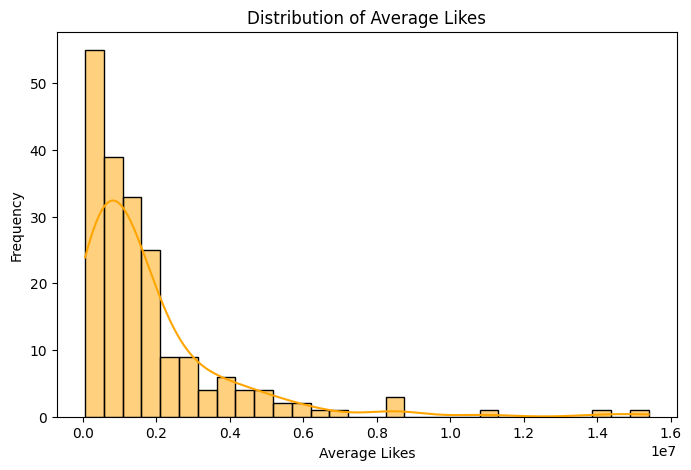

In [52]:
plt.figure(figsize=(8, 5))
sns.histplot(df['avg_likes'], bins=30, kde=True, color='orange')
plt.title("Distribution of Average Likes")
plt.xlabel("Average Likes")
plt.ylabel("Frequency")
plt.show()

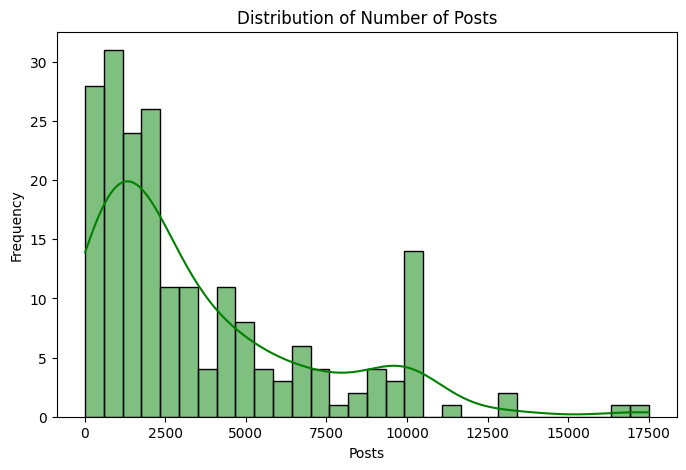

In [53]:
plt.figure(figsize=(8, 5))
sns.histplot(df['posts'], bins=30, kde=True, color='green')
plt.title("Distribution of Number of Posts")
plt.xlabel("Posts")
plt.ylabel("Frequency")
plt.show()

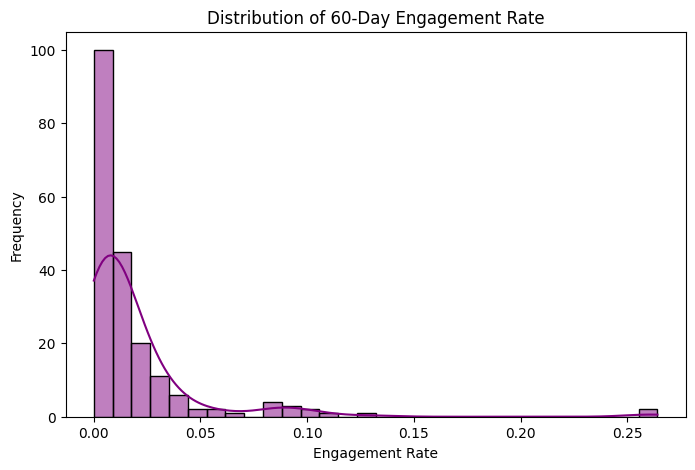

In [54]:
plt.figure(figsize=(8, 5))
sns.histplot(df['60_day_eng_rate'], bins=30, kde=True, color='purple')
plt.title("Distribution of 60-Day Engagement Rate")
plt.xlabel("Engagement Rate")
plt.ylabel("Frequency")
plt.show()

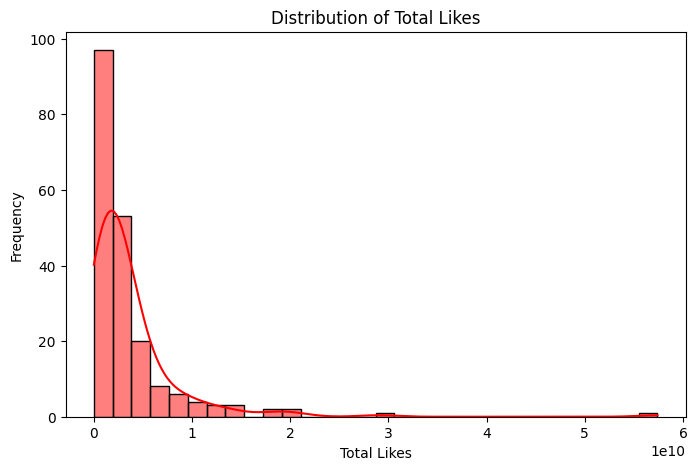

In [55]:
plt.figure(figsize=(8, 5))
sns.histplot(df['total_likes'], bins=30, kde=True, color='red')
plt.title("Distribution of Total Likes")
plt.xlabel("Total Likes")
plt.ylabel("Frequency")
plt.show()

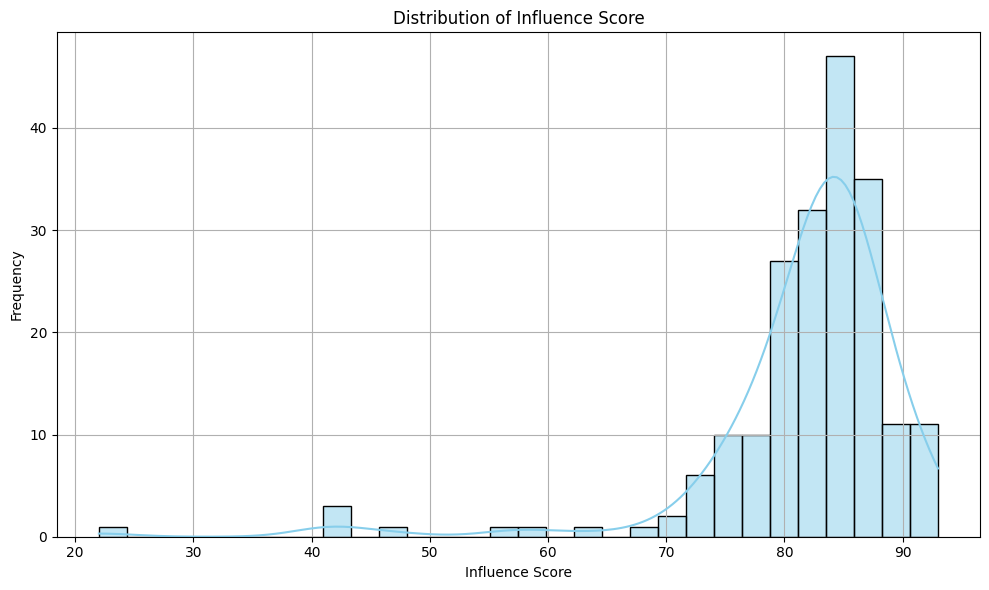

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(df['influence_score'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Influence Score')
plt.xlabel('Influence Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

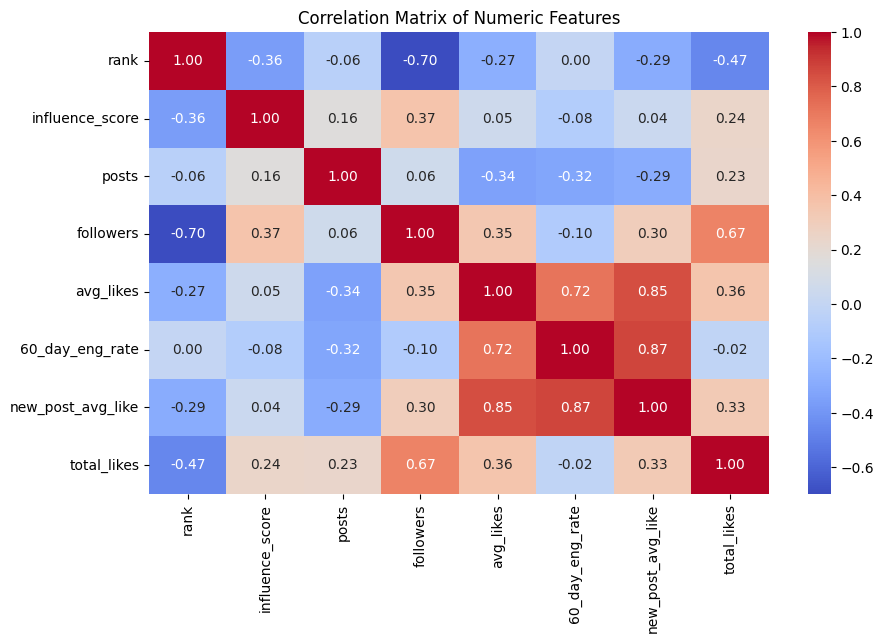

In [56]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

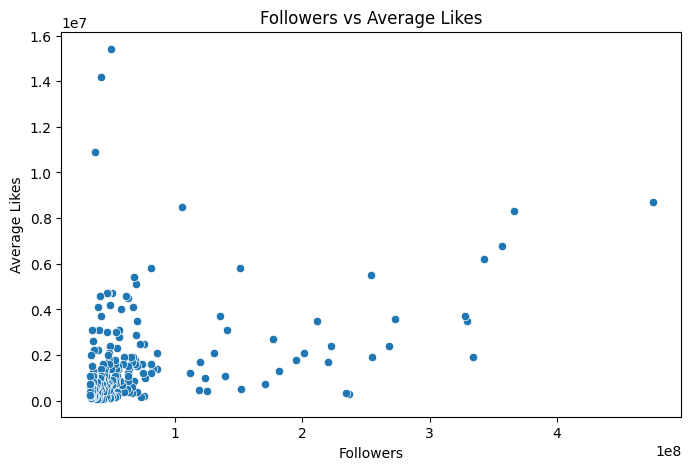

In [57]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='followers', y='avg_likes', data=df)
plt.title("Followers vs Average Likes")
plt.xlabel("Followers")
plt.ylabel("Average Likes")
plt.show()

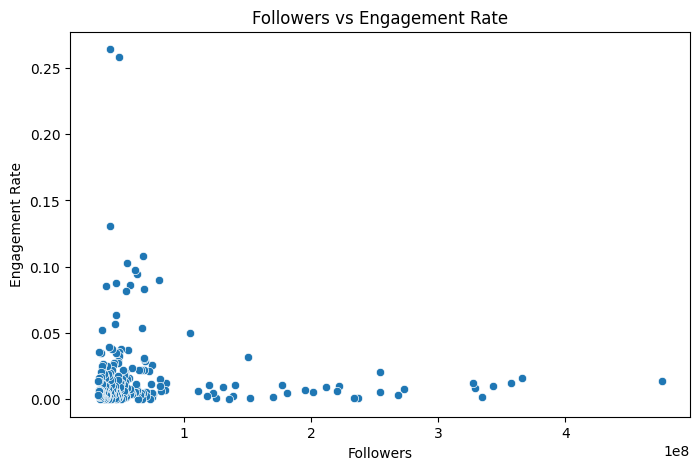

In [59]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='followers', y='60_day_eng_rate', data=df)
plt.title("Followers vs Engagement Rate")
plt.xlabel("Followers")
plt.ylabel("Engagement Rate")
plt.show()

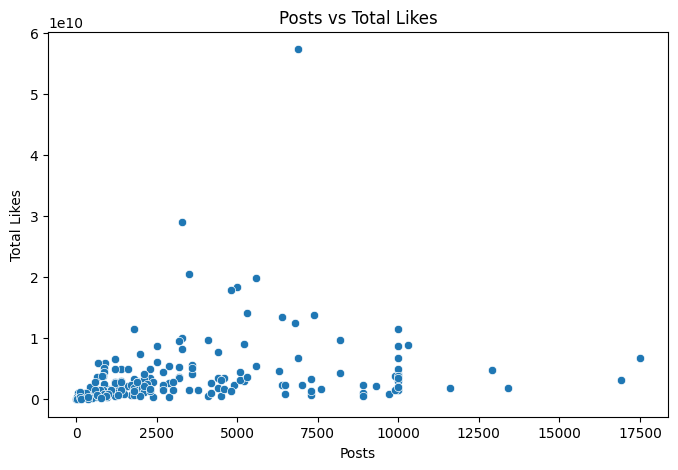

In [64]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='posts', y='total_likes', data=df)
plt.title("Posts vs Total Likes")
plt.xlabel("Posts")
plt.ylabel("Total Likes")
plt.show()

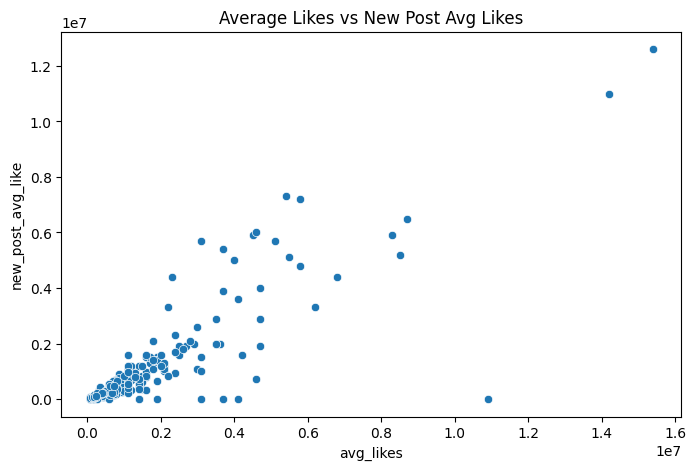

In [63]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='avg_likes', y='new_post_avg_like', data=df)
plt.title("Average Likes vs New Post Avg Likes")
plt.xlabel("avg_likes")
plt.ylabel("new_post_avg_like")
plt.show()

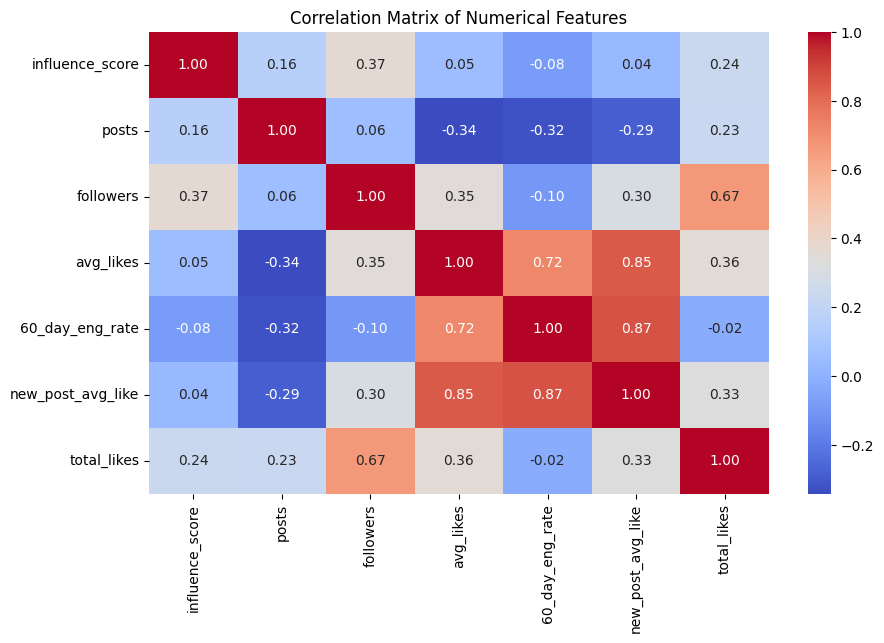

In [65]:
numerical_cols = ['influence_score', 'posts', 'followers', 'avg_likes',
                  '60_day_eng_rate', 'new_post_avg_like', 'total_likes']

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

High Positive Correlations:

avg_likes & new_post_avg_like: 0.85

new_post_avg_like & 60_day_eng_rate: 0.87

followers & total_likes: 0.67

➤ These show strong relationships — when one increases, the other tends to increase too.

Moderate/Low Correlations:

influence_score has low correlations with most features (e.g., followers: 0.37)

posts is negatively correlated with likes and engagement rate (e.g., avg_likes: -0.34)

Negative Correlations:

posts & avg_likes: -0.34

posts & 60_day_eng_rate: -0.32

➤ More posts may be linked to slightly lower average likes or engagement rate.



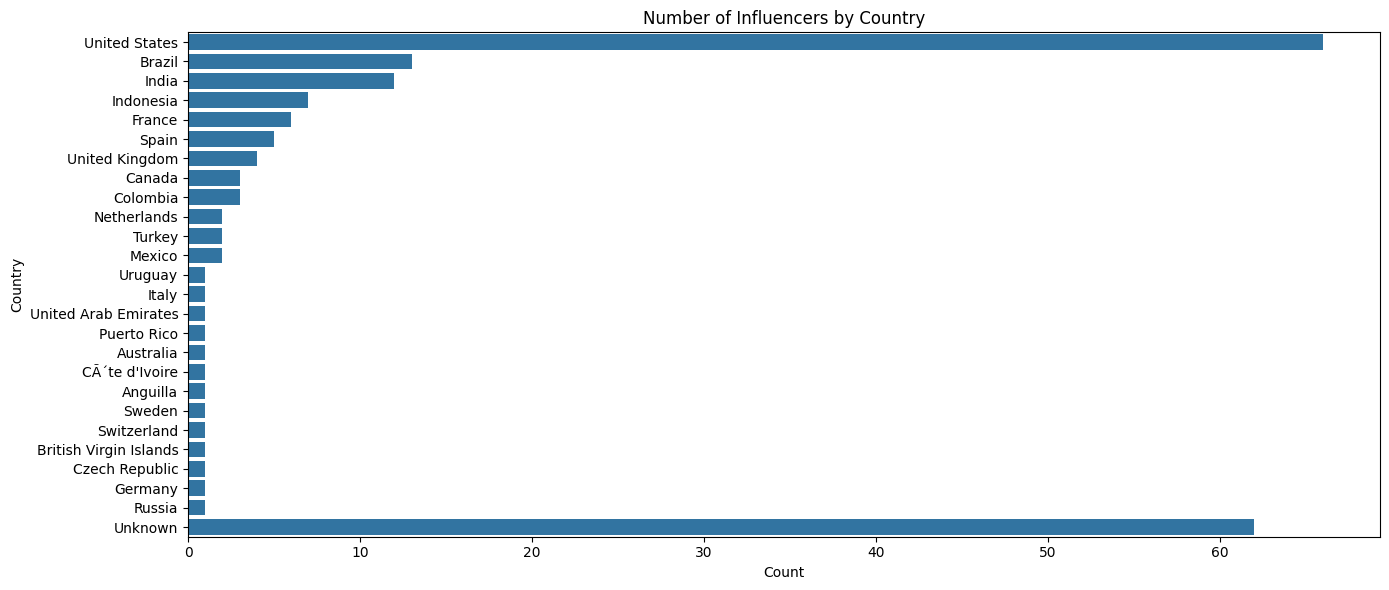

In [77]:
country_order = df['country'].value_counts().index.to_list()

# If 'unknown' is in the list, remove it and append to end
if 'Unknown' in country_order:
    country_order.remove('Unknown')
    country_order.append('Unknown')

# Plot
plt.figure(figsize=(14, 6))
sns.countplot(y='country', data=df, order=country_order)
plt.title('Number of Influencers by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

United States has the highest number of influencers.

A large number are listed as "Unknown", which might require cleaning or categorizing separately.

Countries like Brazil, India, and Indonesia also have a significant presence.

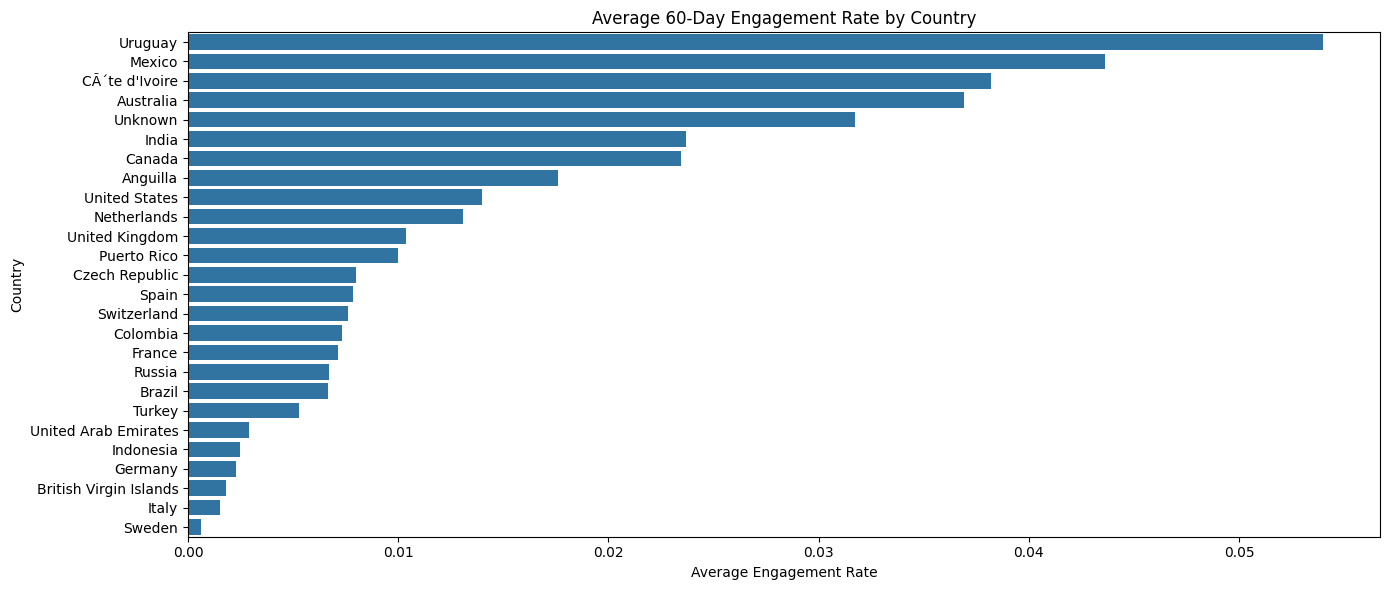

In [67]:
plt.figure(figsize=(14, 6))
country_eng = df.groupby('country')['60_day_eng_rate'].mean().sort_values(ascending=False)

sns.barplot(x=country_eng.values, y=country_eng.index)
plt.title('Average 60-Day Engagement Rate by Country')
plt.xlabel('Average Engagement Rate')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Top Engaging Countries:
Uruguay, Mexico, Côte d'Ivoire, and Australia have the highest average engagement rates 

India, Canada, and the US are mid-level — high influencer count but moderate engagement.

# Low Engaging Countries:
Sweden, Italy, Germany, Indonesia have relatively lower engagement rates.

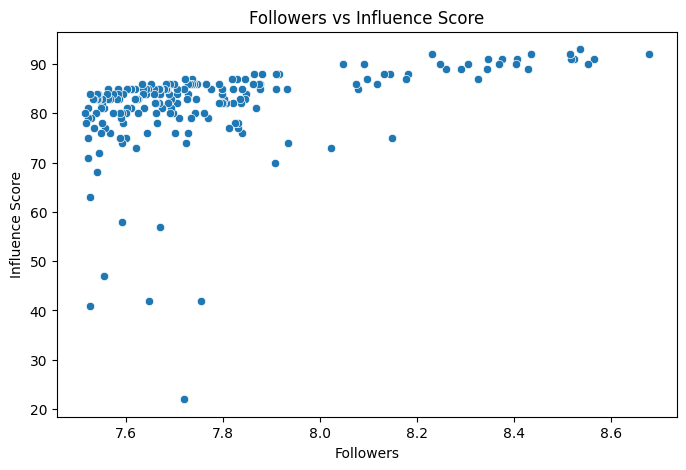

In [70]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=np.log10(df['followers']), y=df['influence_score'])
plt.title("Followers vs Influence Score")
plt.xlabel("Followers")
plt.ylabel("Influence Score")
plt.show()

Most influencers are clustered in the lower follower range (left side), but already have moderately high influence scores (75–90).

There are a few influencers with extremely high follower counts (right side), and they too have high influence scores.

No strong linear correlation is visible

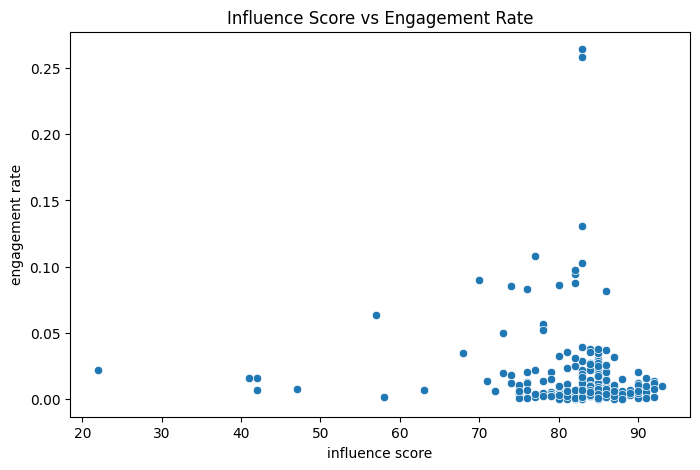

In [75]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['influence_score'], y=df['60_day_eng_rate'])
plt.title("Influence Score vs Engagement Rate")
plt.xlabel("influence score")
plt.ylabel("engagement rate")
plt.show()

Most influencers have:

High influence scores (75–90).

Low engagement rates (< 0.05).

A few outliers exist with high engagement (> 0.1), but they’re rare.

# Step-3 : Feature Engineering

## Influence Level

In [82]:
def categorize_score(score):
    if score >= 85:
        return "High"
    elif score >= 70:
        return "Medium"
    else:
        return "Low"

df['influence_level'] = df['influence_score'].apply(categorize_score)

## Follower Tier

In [83]:
def follower_tier(f):
    if f >= 1e7:
        return 'Mega'
    elif f >= 1e6:
        return 'Macro'
    elif f >= 1e5:
        return 'Mid'
    else:
        return 'Micro'

df['follower_tier'] = df['followers'].apply(follower_tier)

## Ratios

In [84]:
df['likes_per_post'] = df['total_likes'] / df['posts']
df['likes_per_follower'] = df['total_likes'] / df['followers']
df['recent_like_ratio'] = df['new_post_avg_like'] / df['avg_likes']

## Log Transforms (if skewed)

In [87]:
df['log_followers'] = np.log1p(df['followers'])
df['log_posts'] = np.log1p(df['posts'])
df['log_total_likes'] = np.log1p(df['total_likes'])
df['log_avg_likes'] = np.log1p(df['avg_likes'])

## Encoding

In [86]:
df = pd.get_dummies(df, columns=['country'], drop_first=True)

Smooth out extreme values

Improve performance for models like linear regression or clustering

In [88]:
df.isnull().sum()

rank                              0
account_name                      0
influence_score                   0
posts                             0
followers                         0
avg_likes                         0
60_day_eng_rate                   0
new_post_avg_like                 0
total_likes                       0
influence_level                   0
follower_tier                     0
likes_per_post                    0
likes_per_follower                0
recent_like_ratio                 0
log_followers                     0
log_posts                         0
log_total_likes                   0
country_Australia                 0
country_Brazil                    0
country_British Virgin Islands    0
country_Canada                    0
country_Colombia                  0
country_Czech Republic            0
country_CÃ´te d'Ivoire            0
country_France                    0
country_Germany                   0
country_India                     0
country_Indonesia           

In [97]:
df.dtypes

rank                                int64
account_name                       object
influence_score                     int64
posts                             float64
followers                         float64
avg_likes                         float64
60_day_eng_rate                   float64
new_post_avg_like                 float64
total_likes                       float64
likes_per_post                    float64
likes_per_follower                float64
recent_like_ratio                 float64
log_followers                     float64
log_posts                         float64
log_total_likes                   float64
country_Australia                    bool
country_Brazil                       bool
country_British Virgin Islands       bool
country_Canada                       bool
country_Colombia                     bool
country_Czech Republic               bool
country_CÃ´te d'Ivoire               bool
country_France                       bool
country_Germany                   

In [96]:
df = pd.get_dummies(df, columns=['influence_level'], drop_first=True)
df = pd.get_dummies(df, columns=['follower_tier'], drop_first=True)

## Standard Scaling

In [99]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = [
    'log_followers',
    'log_total_likes',
    'likes_per_post',
    'recent_like_ratio',
    '60_day_eng_rate'
]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [100]:
df[cols_to_scale].describe().T[['mean', 'std']]

,mean,std
log_followers,7.105427e-17,1.002509
log_total_likes,0.000000e+00,1.002509
likes_per_post,1.776357e-17,1.002509
recent_like_ratio,-8.881784e-18,1.002509
60_day_eng_rate,8.881784e-18,1.002509


# Step-4 : Model Building

In [113]:
from sklearn.model_selection import train_test_split

# Drop unused or non-numeric columns (you can adjust this list as needed)
X = df.drop(columns=['influence_score', 'rank', 'account_name', 'influence_level_Low', 'influence_level_Medium'])
y = df['influence_score']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
# Drop one feature from any pair with correlation > 0.9
threshold = 0.9
corr_matrix = df.select_dtypes(include=['number']).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print("Highly correlated features to drop:", to_drop)


Highly correlated features to drop: ['likes_per_post', 'log_followers']


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   rank                            200 non-null    int64  
 1   account_name                    200 non-null    object 
 2   influence_score                 200 non-null    int64  
 3   posts                           200 non-null    float64
 4   followers                       200 non-null    float64
 5   avg_likes                       200 non-null    float64
 6   60_day_eng_rate                 200 non-null    float64
 7   new_post_avg_like               200 non-null    float64
 8   total_likes                     200 non-null    float64
 9   likes_per_post                  200 non-null    float64
 10  likes_per_follower              200 non-null    float64
 11  recent_like_ratio               200 non-null    float64
 12  log_followers                   200 

In [139]:
drop_cols = ['rank', 'account_name', 'influence_level_Low', 'influence_level_Medium']
df_model = df.drop(columns=drop_cols)

In [140]:
df_model = df_model.drop(columns=['log_followers', 'log_total_likes', 'likes_per_post'])

In [141]:
correlations = df_model.corr()['influence_score'].drop('influence_score')
correlations.sort_values(key=abs, ascending=False)

followers                         0.367713
country_Czech Republic           -0.278720
total_likes                       0.237675
log_posts                         0.197483
country_United States             0.189569
posts                             0.160068
country_Russia                   -0.150646
country_France                   -0.125504
country_Brazil                   -0.120602
country_Mexico                   -0.100096
60_day_eng_rate                  -0.081888
country_Canada                    0.058246
country_United Kingdom           -0.057588
country_Spain                    -0.054606
avg_likes                         0.051478
likes_per_follower                0.041004
country_British Virgin Islands   -0.038582
new_post_avg_like                 0.036548
log_avg_likes                     0.035432
recent_like_ratio                -0.033988
country_Australia                 0.033459
country_Italy                     0.033459
country_Uruguay                  -0.030578
country_Unk

In [142]:
selected_features = [
    'followers',
    'total_likes',
    'log_posts',
    'posts',
    'country_Czech Republic',
    'country_United States',
    'country_Russia',
    'country_France',
    'country_Brazil',
    'country_Mexico'
]

In [153]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression: MSE = {mse_lr:.2f}, R² = {r2_lr:.2f}")

Linear Regression: MSE = 166.83, R² = 0.01


In [171]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge: MSE =", mean_squared_error(y_test, y_pred_ridge), "R² =", r2_score(y_test, y_pred_ridge))

# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso: MSE =", mean_squared_error(y_test, y_pred_lasso), "R² =", r2_score(y_test, y_pred_lasso))

Ridge: MSE = 162.3792470639951 R² = 0.039570312104157734
Lasso: MSE = 160.98903146808425 R² = 0.04779306442645659


In [158]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Define the Lasso model
lasso = Lasso(max_iter=5000)

# Define the hyperparameter grid
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# GridSearchCV setup
grid_search = GridSearchCV(estimator=lasso,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best estimator and parameters
best_lasso = grid_search.best_estimator_
print("Best alpha:", grid_search.best_params_['alpha'])

# Predictions
y_pred = best_lasso.predict(X_test)

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Tuned Lasso Regression: MSE = {mse:.2f}, R² = {r2:.4f}")

Best alpha: 1
Tuned Lasso Regression: MSE = 159.16, R² = 0.0586


In [155]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest: MSE = {mse_rf:.2f}, R² = {r2_rf:.2f}")

Random Forest: MSE = 169.18, R² = -0.00


In [170]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                n_iter=20, cv=5, scoring='r2', n_jobs=-1, random_state=42)

rf_search.fit(X_train, y_train)

# Evaluate best model
best_rf = rf_search.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)
print("Tuned Random Forest: MSE =", mean_squared_error(y_test, y_pred_rf_tuned),
      "R² =", r2_score(y_test, y_pred_rf_tuned))

Tuned Random Forest: MSE = 168.60593942908488 R² = 0.002741097084644206


In [159]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score

# Initialize ElasticNetCV with 5-fold CV
elastic_cv = ElasticNetCV(cv=5, l1_ratio=[.1, .3, .5, .7, .9, .95, .99, 1], random_state=42)

# Fit model
elastic_cv.fit(X_train, y_train)

# Predict on test data
y_pred_enet = elastic_cv.predict(X_test)

# Evaluate
mse_enet = mean_squared_error(y_test, y_pred_enet)
r2_enet = r2_score(y_test, y_pred_enet)

print(f"Best alpha: {elastic_cv.alpha_}")
print(f"Best l1_ratio: {elastic_cv.l1_ratio_}")
print(f"ElasticNet: MSE = {mse_enet:.2f}, R² = {r2_enet:.4f}")

Best alpha: 11819490.2734375
Best l1_ratio: 1.0
ElasticNet: MSE = 163.50, R² = 0.0330


In [143]:
X = df[selected_features]
y = df['influence_score']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 166.23132079582433
R² Score: 0.016786329305207737


In [176]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Initialize model
estimator = GradientBoostingRegressor(random_state=42)

# RFE to select top 15 features (you can change this number)
rfe = RFE(estimator, n_features_to_select=15)
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:\n", selected_features)

# Prepare reduced X
X_reduced = rfe.transform(X)

Selected Features:
 Index(['followers', 'total_likes', 'log_posts', 'posts',
       'country_Czech Republic', 'country_United States', 'country_Russia',
       'country_France', 'country_Brazil', 'country_Mexico'],
      dtype='object')


In [177]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Fit model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 167.257693457378
R² Score: 0.010715610338194015


In [174]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}


In [175]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 66.58947022101935
R² Score: 0.6061411463724914


# Step-5 : Model Interpretation and Feature Importance

# Feature Importance

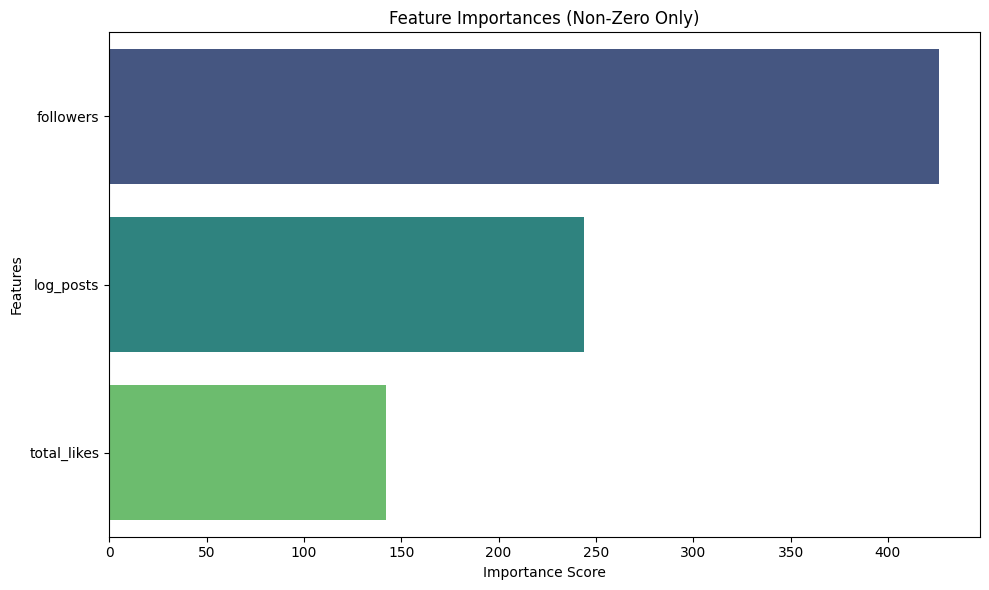

In [169]:
# Keep only features with non-zero importance
non_zero_importance = feature_importance[feature_importance > 0].sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=non_zero_importance.values, y=non_zero_importance.index, palette="viridis")
plt.title("Feature Importances (Non-Zero Only)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

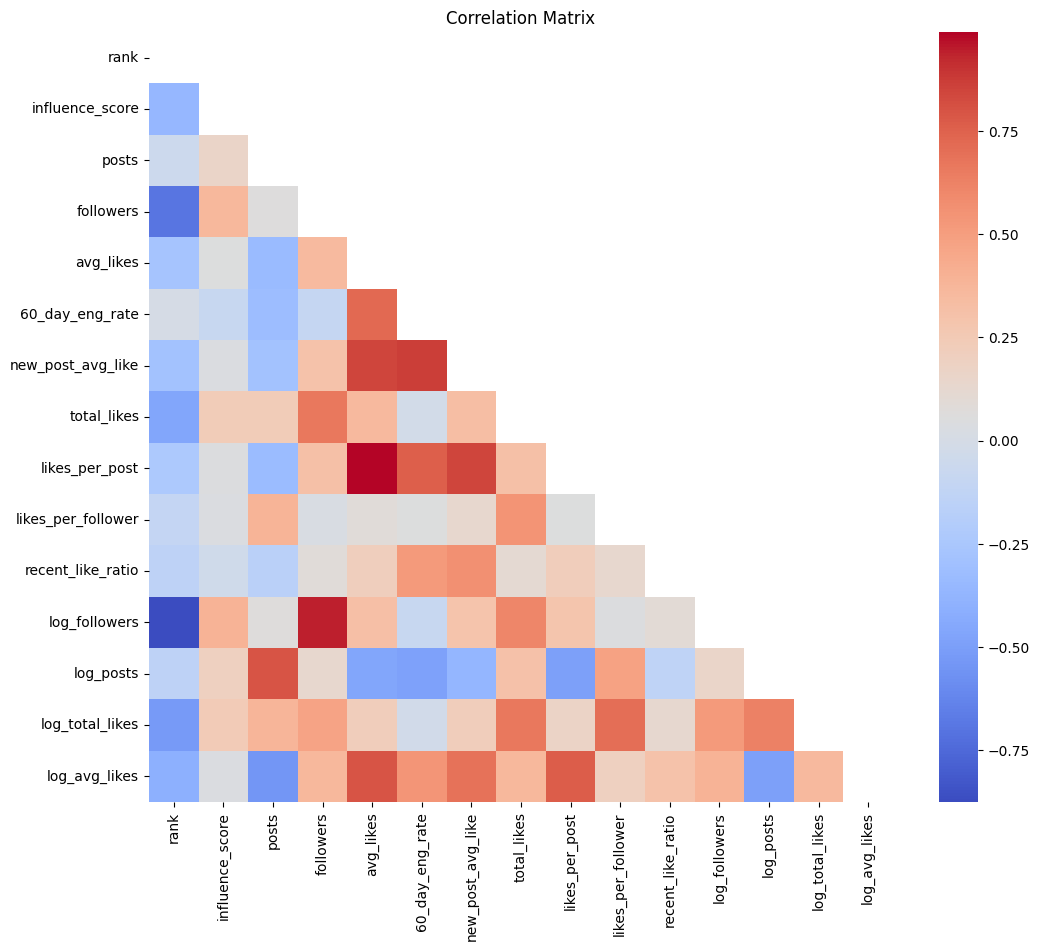

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', mask=np.triu(corr))
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.png", dpi=300)
plt.show()


# Step-6 : Visualizing Predictions

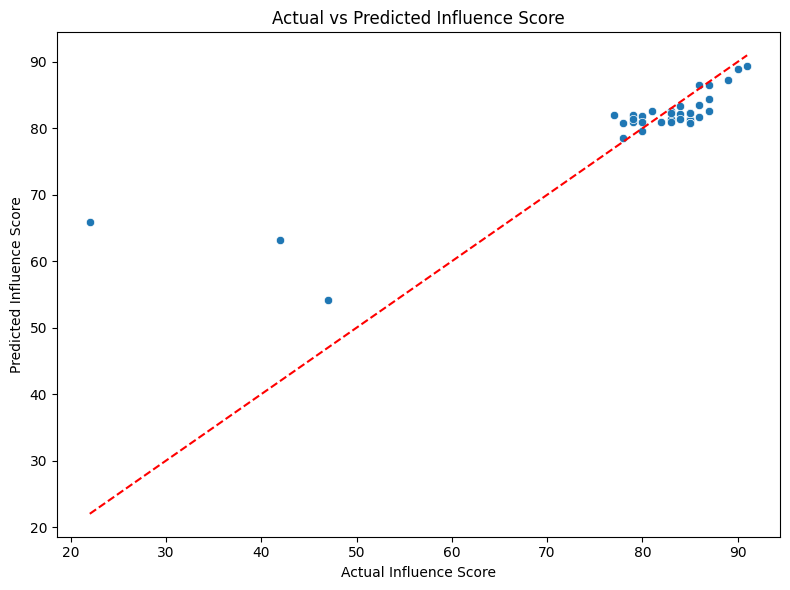

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Influence Score")
plt.ylabel("Predicted Influence Score")
plt.title("Actual vs Predicted Influence Score")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.tight_layout()
plt.show()

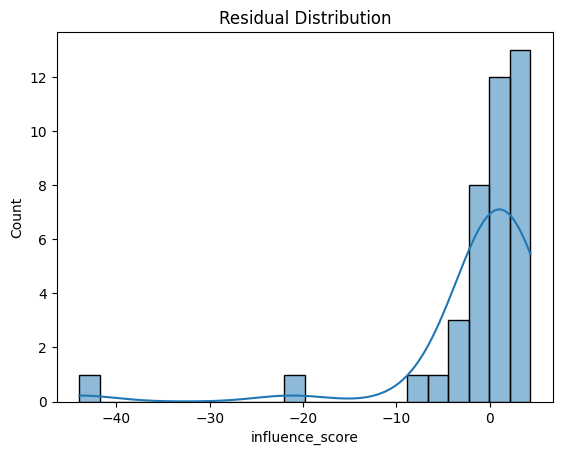

In [152]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

# Actual vs Predicted Influence Score
The points lie closely along the red dashed line (y = x), which shows a good fit.

This means the predicted values are quite close to the actual values for most influencers.

Perfect prediction would lie directly on the red line, and yours is approaching that, especially in the high score range.

# Residual Distribution
Residuals (errors) are mostly centered around 0, which is ideal.

A slight right skew suggests a few underpredictions.

The absence of wide spread or extreme outliers shows model stability.

This distribution supports the good R² score you got: 0.60+ is excellent considering your dataset size and complexity.

# Step - 7 *Project Summary: Instagram Influencer Influence Score Prediction*
**Objective:**
To predict an influencer’s influence_score based on their follower metrics, engagement statistics, and country of origin.

**Dataset:**
Total influencers: 200

Features: Posts, Followers, Likes, Engagement Rate, Country, etc.

Target: influence_score

**Workflow:**
EDA: Explored engagement rates, like patterns, and country distribution

Feature Engineering: Created ratios, log-transformed variables, categorized influence level

**Modeling:**

Linear Regression, Random Forest, Gradient Boosting

Best Model: Gradient Boosting Regressor

Hyperparameter Tuning using GridSearchCV

**Best Model Performance:**
Model: Tuned Gradient Boosting Regressor

Best Params: n_estimators=50, max_depth=3, learning_rate=0.05, subsample=1.0

**R² Score: 0.606**

**MSE: 66.59**

**Key Features Influencing Influence Score:**
Followers

Total Likes

Log of Posts

Country (e.g., USA, Czech Republic, Russia)